In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/SW엔지니어

/content/drive/MyDrive/Colab Notebooks/SW엔지니어


In [3]:
!pwd

/content/drive/MyDrive/Colab Notebooks/SW엔지니어


#### 목표
- 손글씨 데이터를 분류하는 딥러닝 모델을 설게
- 다중분류 딥러닝 모델

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Keras 내부에서 제공해주는 손글씨 데이터 불러오기
from tensorflow.keras.datasets import mnist

In [6]:
(a,b), (c,d) = ([1,2],[3,4]),([5,6],[7,8])
c

[5, 6]

In [7]:
from re import X
# 훈련용 데이터, 테스트 데이터 모두 나뉘어져 있음. 한번에 저장
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# 데이터 크기 확인
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# 학습 60000, 테스트 10000
# 28*28 픽셀

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [12]:
# 정답데이터 확인
np.unique(y_train)
# 클래스 10개 -> 다중분류
# 0~9까지의 숫자중 하나를 예측하는 모델을 구축

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

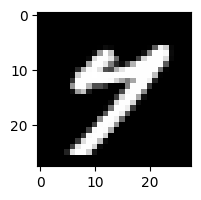

In [13]:
# 사진 확인
plt.figure(figsize=(2,2))
plt.imshow(X_train[1001], cmap='gray')

In [14]:
X_train[1001]
# 흑백사진 (0~255)
# 0 : 검은색
# 255 : 흰색

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  13,
          7,   0,   0,   0,   0,   0,   0,   2,  93, 244, 207,   8,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15, 157, 254,
        197,   0,   0,   0,   0,   0,  18, 131, 254, 254, 248,  11,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 220, 254, 254,
        230, 104,   0,   0,   0,  65, 216, 254, 254, 254, 218,   8,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 254, 254, 231,
        126,  40,  11,  70, 180, 254, 254, 254, 254, 254,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  40, 183, 251, 254, 226,  81,
         70, 180, 229, 254, 254, 254, 254, 254, 254, 115,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   7, 208, 254, 254, 255, 254, 254,
        254, 255, 254, 254, 254, 254, 254, 254, 190,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  53, 254, 254, 254, 254, 254, 253,
        250, 212, 169, 125, 167, 254, 254, 241,  35,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 150, 254, 254, 181,  77,  77,  48,
          0,   0,   0, 128, 254, 254, 253,  57,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  14, 157, 195,  29,   0,   0,   0,
          0,   0,  75, 248, 254, 254, 139,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  59, 217, 254, 254, 170,  15,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         15, 217, 254, 254, 214,  15,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
        113, 254, 254, 238,  55,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  89,
        254, 254, 239,  81,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 141, 254,
        254, 240, 106,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  66, 252, 254,
        252, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 250, 254, 252,
        171,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  54, 249, 254, 254, 210,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  56, 223, 254, 254, 189,  11,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  6

In [15]:
y_train[1001] # 라벨링된 데이터가 정답데이터에 들어있음

np.uint8(7)

#### MLP 모델링
- 입력층의 구조, 출력층 구조 (다중분류)
- 학습능력을 위한 중간층의 깊이 고려
- loss, optimizer 설정
- 학습결과 시각화를 통한 일반화 판단

In [16]:
# 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
# Flatten : 2차원 사진데이터(28*28)를 1차원으로 표현해주기 위한 클래스
# 현재 데이터셋 (28*28) 2차원 형태 > 1차원 (선형모델을 돌리기 위해)

In [34]:
# 1. 모델 설계
# 뼈대
model = Sequential()

# 입력층
model.add(InputLayer(input_shape=(28,28)))

# 중간층
model.add(Flatten()) # 2차원 사진 데이터를 1차원으로 변환
model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=8, activation='sigmoid'))

# 출력층
model.add(Dense(units=10, activation='softmax')) # units는 클래스의 개수만큼 설정.

# 다중분류시 출력층에서 사용하는 활성화 함수 : softmax
# softmax : 각각의 확률값(클래스 개수만큼의 확률값)을 총합이 1이 되도록 변환해주는 함수

In [29]:
# 모델 학습방법 및 평가 설정
model.compile(loss= 'categorical_crossentropy', # 다중분류
              optimizer = 'SGD',
              metrics= ['accuracy']
              )

In [33]:
# 모델 학습
h = model.fit(X_train, y_train_onehot,
              validation_split=0.2,
              epochs = 20,
              batch_size=32 # 디폴트 값 32
              )

# 오류 확인 > 정답데이터의 shape가 일치하지 않음
# y_train 형태를 확인해보니, 1개의 결과값(0~9 클래스 중 하나)
# 모델링 출력 결과 : 10개의 클래스에 대한 각각의 확률값

# 모델 출력값 : 10개
# 정답 값 : 1개

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2206 - loss: 2.2571 - val_accuracy: 0.5468 - val_loss: 1.9593
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5525 - loss: 1.8938 - val_accuracy: 0.6191 - val_loss: 1.6728
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6308 - loss: 1.5963 - val_accuracy: 0.7076 - val_loss: 1.3666
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7099 - loss: 1.3275 - val_accuracy: 0.7495 - val_loss: 1.1691
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7437 - loss: 1.1465 - val_accuracy: 0.7733 - val_loss: 1.0255
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7710 - loss: 0.9994 - val_accuracy: 0.8042 - val_loss: 0.8915
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7894 - loss: 0.8920 - val_accuracy: 0.7730 - val_loss: 0.8854
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7882 - loss: 0.8342 - 

In [ ]:
# 문제 해결 방법
# 1. 정답 데이터의 형태를 원-핫 인코딩
# 2. compile단계에서 loss 함수를 sparse_categorical_crossentropy로 변경
  # sparse_categorical_crossentropy : 정답 데이터를 자동으로 인코딩하여 계산

In [31]:
# 방법 1.정답 데이터의 형태를 원-핫 인코딩
# 모델의 예측값은 클래스의 개수만큼의 확률값으로 출력되기에, 정답 데이터를 원핫인코딩된 형태로 변경

from tensorflow.keras.utils import to_categorical

# to_categorical : 정수형 라벨을 원핫 인코딩된 벡터로 변환하는 도구
# 각 클래스를 벡터로 표현하며, 해당 클래스의 인덱스 위치에 1, 나머지는 0

y_train_onehot = to_categorical(y_train)

In [35]:
# 방법 2. compile단계에서 loss 함수를 sparse_categorical_crossentropy로 변경

model.compile(loss= 'sparse_categorical_crossentropy', # 다중분류
              optimizer = 'SGD',
              metrics= ['accuracy']
              )

In [36]:
# 모델 학습
h = model.fit(X_train, y_train,
              validation_split=0.2,
              epochs = 20,
              )

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2509 - loss: 2.1967 - val_accuracy: 0.5374 - val_loss: 1.9027
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5599 - loss: 1.8223 - val_accuracy: 0.6538 - val_loss: 1.5653
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6545 - loss: 1.5154 - val_accuracy: 0.7112 - val_loss: 1.3397
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7174 - loss: 1.2848 - val_accuracy: 0.7607 - val_loss: 1.1425
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7593 - loss: 1.1209 - val_accuracy: 0.7585 - val_loss: 1.0411
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7647 - loss: 1.0116 - val_accuracy: 0.7682 - val_loss: 0.9797
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7795 - loss: 0.9285 - val_accuracy: 0.8008 - val_loss: 0.8735
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7834 - loss: 0.8864 - 

In [37]:
# 평가
model.evaluate(X_test, y_test)
# 최종적으로 평가 정확도 = 약 85%

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8358 - loss: 0.5863


[0.5386408567428589, 0.8546000123023987]

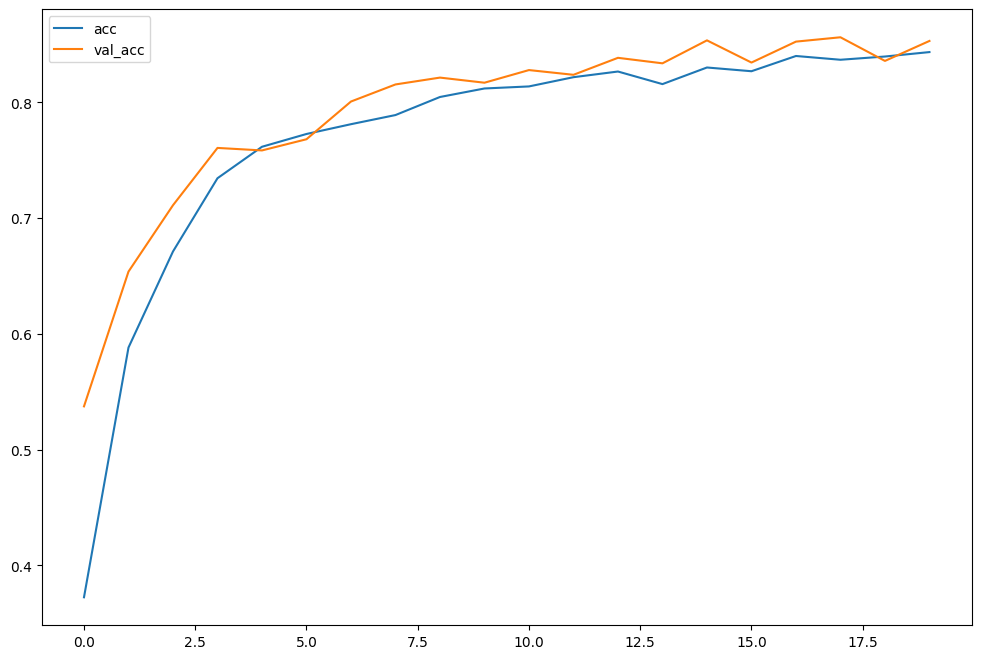

In [39]:
# 시각화
plt.figure(figsize=(12,8))
plt.plot(h.history['accuracy'], label='acc')
plt.plot(h.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [40]:
# 더 깊게 은닉층을 쌓아보자

# 1. 모델 설계
# 뼈대
model = Sequential()

# 입력층
model.add(InputLayer(input_shape=(28,28)))

# 중간층
model.add(Flatten()) # 2차원 사진 데이터를 1차원으로 변환
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=92, activation='sigmoid'))
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=12, activation='sigmoid'))
model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=4, activation='sigmoid'))

# 출력층
model.add(Dense(units=10, activation='softmax')) # units는 클래스의 개수만큼 설정.

# 2. 학습 방법 및 평가방법 설정
model.compile(loss= 'sparse_categorical_crossentropy', # 다중분류
              optimizer = 'SGD',
              metrics= ['accuracy']
              )

# 3. 모델 학습
h = model.fit(X_train, y_train,
              validation_split=0.2,
              epochs = 20,
              batch_size=64   # batch_size : 모델이 한번에 학습하는 데이터 샘플의 개수
              )               # 전체 데이터셋을 한번에 학습할 경우 메모리문제 발생.
                              # 데이터셋을 작은 단위로 나누어 모델에 입력. 이 단위를 batch라고 함
# 4. 평가
model.evaluate(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1136 - loss: 2.3385 - val_accuracy: 0.1060 - val_loss: 2.3062
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1158 - loss: 2.3024 - val_accuracy: 0.1060 - val_loss: 2.3024
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1144 - loss: 2.3012 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1138 - loss: 2.3010 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1134 - loss: 2.3014 - val_accuracy: 0.1060 - val_loss: 2.3022
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1149 - loss: 2.3007 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1111 - loss: 2.3015 - val_accuracy: 0.1060 - val_loss: 2.3022
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1133 - loss: 2.3013 - val_accuracy: 0.

[2.3009793758392334, 0.11349999904632568]

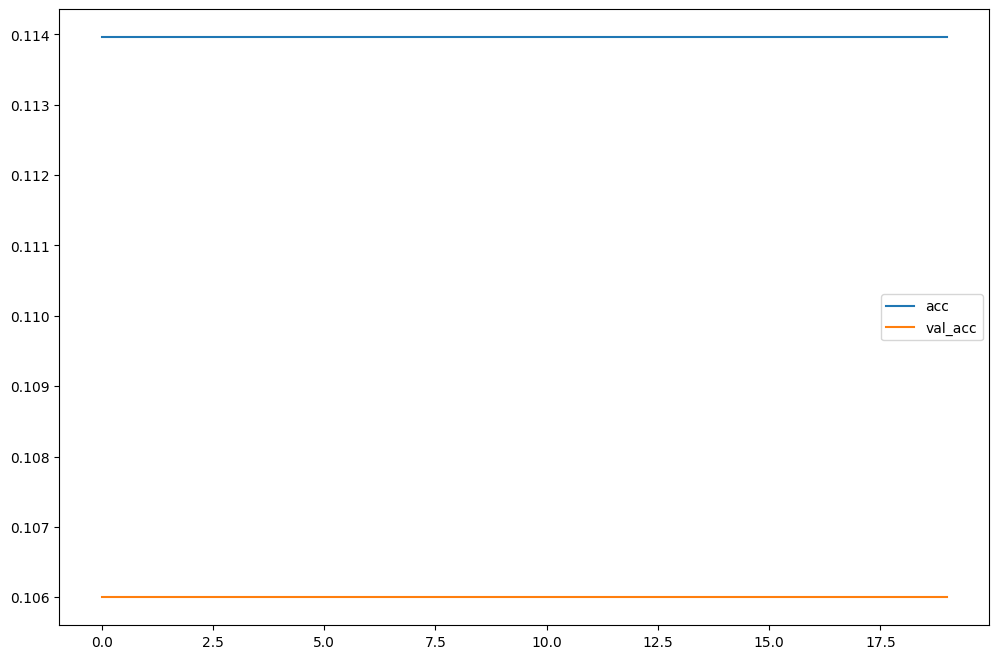

In [41]:
# 시각화
plt.figure(figsize=(12,8))
plt.plot(h.history['accuracy'], label='acc')
plt.plot(h.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

#### 활성화함수, 최적화함수 좋바에 따른 성능 비교
- 손글씨 데이터
1. sigmoid + SGD 조합
2. relu + SGD 조합
3. relu + adam 조합

In [42]:
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# 1. 신경망 구조설계 (model1, model2, model3)
# 입력층
# 은닉층 (5개)
# 출력층

# 2. 학습방법 및 평가방법 설정
# optimizer = 다른 조합 (SGD, adam)

# 3. 학습 (h1, h2, h3)

# 4. 평가

In [43]:
# 1. sigmoid + SGD
# 뼈대
model1 = Sequential()

# 입력층
model1.add(InputLayer(input_shape=(28,28)))

# 중간층
model1.add(Flatten()) # 2차원 사진 데이터를 1차원으로 변환
model1.add(Dense(units=128, activation='sigmoid'))
model1.add(Dense(units=92, activation='sigmoid'))
model1.add(Dense(units=64, activation='sigmoid'))
model1.add(Dense(units=32, activation='sigmoid'))
model1.add(Dense(units=16, activation='sigmoid'))

# 출력층
model1.add(Dense(units=10, activation='softmax')) # units는 클래스의 개수만큼 설정.

# 2. 학습 방법 및 평가방법 설정
model1.compile(loss= 'sparse_categorical_crossentropy', # 다중분류
              optimizer = 'SGD',
              metrics= ['accuracy']
              )

# 3. 모델 학습
h1 = model1.fit(X_train, y_train,
              validation_split=0.2,
              epochs = 20)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1055 - loss: 2.3286 - val_accuracy: 0.1060 - val_loss: 2.3020
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1138 - loss: 2.3013 - val_accuracy: 0.1060 - val_loss: 2.3009
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1136 - loss: 2.2998 - val_accuracy: 0.1060 - val_loss: 2.3003
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1160 - loss: 2.2986 - val_accuracy: 0.1937 - val_loss: 2.2998
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1176 - loss: 2.2980 - val_accuracy: 0.1060 - val_loss: 2.2980
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1160 - loss: 2.2972 - val_accuracy: 0.1060 - val_loss: 2.2969
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1161 - loss: 2.2960 - val_accuracy: 0.1060 - val_loss: 2.2957
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1147 - loss: 2.2936 -

In [44]:
# 1. relu + SGD
# 뼈대
model2 = Sequential()

# 입력층
model2.add(InputLayer(input_shape=(28,28)))

# 중간층
model2.add(Flatten()) # 2차원 사진 데이터를 1차원으로 변환
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=92, activation='relu'))
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=16, activation='relu'))

# 출력층
model2.add(Dense(units=10, activation='softmax')) # units는 클래스의 개수만큼 설정.

# 2. 학습 방법 및 평가방법 설정
model2.compile(loss= 'sparse_categorical_crossentropy', # 다중분류
              optimizer = SGD(learning_rate = 0.001),
              metrics= ['accuracy']
              )
# SGD default 학습률은 0.01
# 학습률이 너무 큰 경우 오차가 큰 값이 그대로 전달되면서 변동이 크다.
# relu함수의 경우 오차가 줄어들지 않을수가 있음

# 3. 모델 학습
h2 = model2.fit(X_train, y_train,
              validation_split=0.2,
              epochs = 20)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3212 - loss: 2.5800 - val_accuracy: 0.5867 - val_loss: 1.2966
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6086 - loss: 1.2251 - val_accuracy: 0.7142 - val_loss: 0.9119
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7186 - loss: 0.8292 - val_accuracy: 0.8037 - val_loss: 0.6620
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8202 - loss: 0.5382 - val_accuracy: 0.8911 - val_loss: 0.3918
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8954 - loss: 0.3649 - val_accuracy: 0.9065 - val_loss: 0.3511
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9166 - loss: 0.2974 - val_accuracy: 0.9188 - val_loss: 0.3022
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9281 - loss: 0.2533 - val_accuracy: 0.9269 - val_loss: 0.2776
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9361 - loss: 0.2242 - val_accu

In [45]:
# 1. relu + Adam
# 뼈대
model3 = Sequential()

# 입력층
model3.add(InputLayer(input_shape=(28,28)))

# 중간층
model3.add(Flatten()) # 2차원 사진 데이터를 1차원으로 변환
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=92, activation='relu'))
model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=32, activation='relu'))
model3.add(Dense(units=16, activation='relu'))

# 출력층
model3.add(Dense(units=10, activation='softmax')) # units는 클래스의 개수만큼 설정.

# 2. 학습 방법 및 평가방법 설정
model3.compile(loss= 'sparse_categorical_crossentropy', # 다중분류
              optimizer = Adam(learning_rate = 0.001),
              metrics= ['accuracy']
              )
# SGD default 학습률은 0.01
# 학습률이 너무 큰 경우 오차가 큰 값이 그대로 전달되면서 변동이 크다.
# relu함수의 경우 오차가 줄어들지 않을수가 있음

# 3. 모델 학습
h3 = model3.fit(X_train, y_train,
              validation_split=0.2,
              epochs = 20)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6067 - loss: 2.2799 - val_accuracy: 0.9172 - val_loss: 0.3255
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9223 - loss: 0.2920 - val_accuracy: 0.9365 - val_loss: 0.2452
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9462 - loss: 0.1956 - val_accuracy: 0.9500 - val_loss: 0.1971
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9580 - loss: 0.1504 - val_accuracy: 0.9491 - val_loss: 0.1920
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9633 - loss: 0.1264 - val_accuracy: 0.9609 - val_loss: 0.1516
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9696 - loss: 0.1087 - val_accuracy: 0.9608 - val_loss: 0.1535
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9725 - loss: 0.0999 - val_accuracy: 0.9642 - val_loss: 0.1385
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9779 - loss: 0.0798 - val_acc

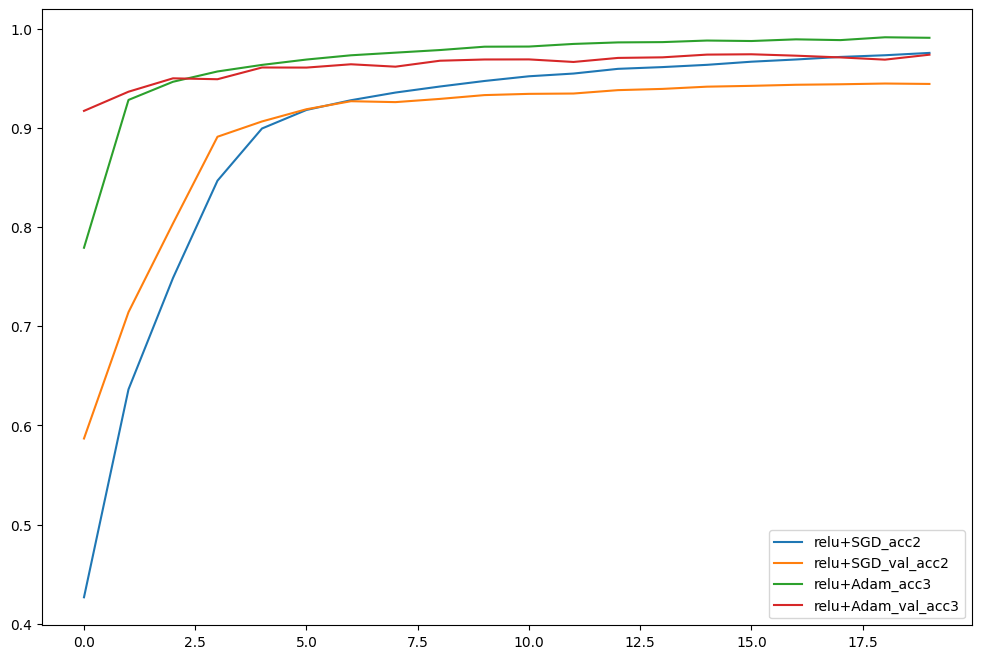

In [47]:
# h1, h2, h3 시각화
plt.figure(figsize=(12,8))

# sig + SGD
#plt.plot(h1.history['accuracy'], label='sig+SGD_acc1')
#plt.plot(h1.history['val_accuracy'], label='sig+SGD_val_acc1')

# relu + SGD
plt.plot(h2.history['accuracy'], label='relu+SGD_acc2')
plt.plot(h2.history['val_accuracy'], label='relu+SGD_val_acc2')

# relu + Adam
plt.plot(h3.history['accuracy'], label='relu+Adam_acc3')
plt.plot(h3.history['val_accuracy'], label='relu+Adam_val_acc3')

plt.legend()
plt.show()

# sig + SGD : 비교적 낮은 학습 속도와 정확도를 보임.

# relu + SGD : 빠른 학습 속도, 높은 정확도. Adam에 비해서 SGD를 사용했기에 다소 부족함.

# relu + Adam : 가장 빠른 학습 속도, 가장 높은 정확도.
# Adam의 적응형 학습률 효과 덕분에 매우 효과적으로 학습이 진행된 것으로 보인다.

#### callback 함수
- 모델저장 및 조기학습 중단
- 모델저장(ModelCheckpoint) : 딥러닝 모델학습시 지정된 epochs를 다 끝내는 경우 과대적합이 발생할 수 있음.
>> 중간에 일반화된 모델을 따로 저장할 수 있는 기능

- 조기학습중단(EarlyStopping) : epochs를 크게 설정할 경우 일정 횟수 이후로는 모델의 성능이 개선되지 않을 수 있다.
>> 시간낭비되는것을 절약 > 모델의 성능이 더이상 개선되지 않는 경우 조기학습중단 기능이 필요함.

In [48]:
# 학습된 모델 저장하기.
model3.save('./data/hand_model.keras')

# 모델 저장시 (.h5, .hdf5)를 사용해 왔지만,
# 최근에는 keras 자체의 새로운 파일형식(.keras)를 사용하는것을 권장